# Options

In [109]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

## Random Walk & Brownian Motion

Let $\Delta t > 0$, and consider a walk starting from $S_{0}$ with step sizes that are $X_{n} \sim \text{Normal}(0, \Delta t)$. 

We can then see that:
- $V_{t} = X_{1} + \dots + X_{n} \sim \text{Normal}(0, t)$, where $t=n\Delta t$
- $V_{t}-V_{s}\sim \text{Normal}(0, t-s)$ given that $s=m\Delta t < n\Delta t < t$

As $\Delta t \rightarrow 0$, we get our brownian motion $W_{t}$, i.e.:$$\Delta W_{t} = W_{t+\Delta t}-W_{t}\sim \sqrt{\Delta t}\space N(0,1)$$

Note:
Why $t=n\Delta t$? Distribution needs to get larger as the time distance gets larger.

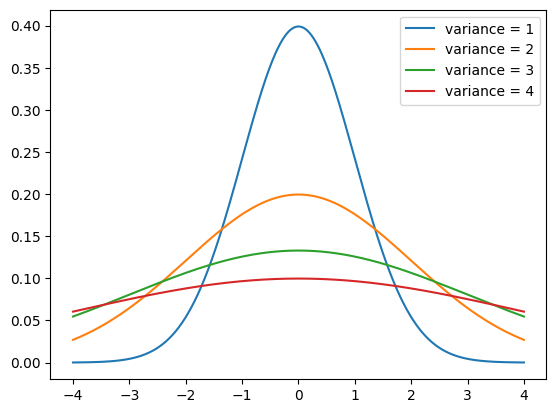

In [7]:
#example of standard normal distribution as time gets larger in a random walk
#plot stnadard normal distribution with increasingly larger variances, combined in a single plot
for i in range(1,5):
    x = np.linspace(-4,4,1000)
    y = stats.norm.pdf(x,0,i)
    plt.plot(x,y,label = 'variance = ' + str(i))
    plt.legend()

Now, on to some simulation examples for our random walk.

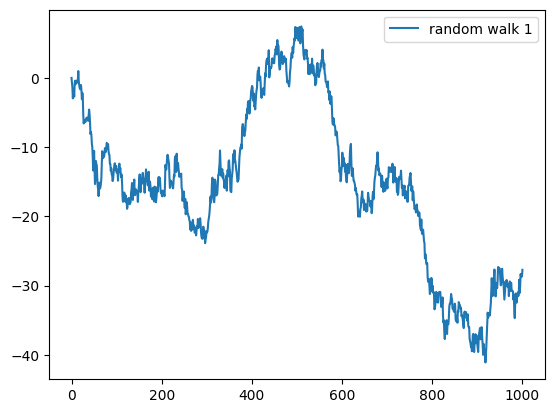

In [54]:
#some examples of random walks based on the standard normal distribution
#showing one random walk
x = np.linspace(0,1000,1000)
y = np.zeros(1000)
for i in range(1,1000):
    y[i] = y[i-1] + np.random.normal(0,1)
plt.plot(x,y,label = 'random walk 1')
plt.legend()

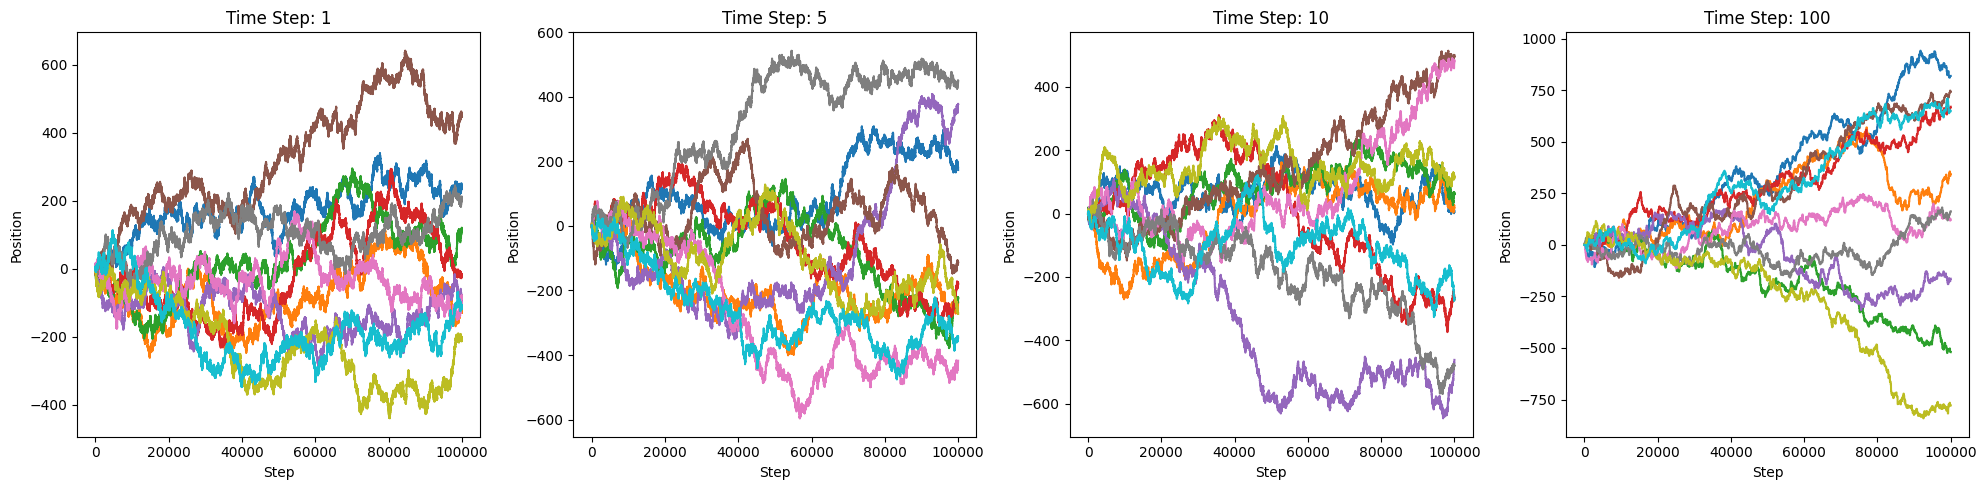

In [80]:
#now showing comparison of 10 random walks with different time steps, with time step change in t increasing
timesteps = [1, 5, 10, 100]
num_steps = 100000  # Total number of steps in each random walk
num_walks = 10      # Number of random walks per timestep

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, len(timesteps), figsize=(20, 5))

# Ensure axes is always an array
axes = np.atleast_1d(axes)

# Iterate over each timestep and subplot axis
for ax, t in zip(axes, timesteps):
    for j in range(num_walks):
        x = np.linspace(0, num_steps, num_steps)
        y = np.zeros(num_steps)
        for i in range(t, num_steps, t):
            # Calculate the jump magnitude scaled by sqrt(t)
            jump = np.random.normal(0, math.sqrt(t))
            # Apply the jump to the current position and all subsequent positions until the next jump
            for k in range(i, min(i + t, num_steps)):
                y[k] = y[i - t] + jump
        ax.plot(x, y)

    ax.set_title(f"Time Step: {t}")
    ax.set_xlabel("Step")
    ax.set_ylabel("Position")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

You can essentially see my plot for 5 different timesteps, with variances scaled to matcht those timesteps. Although it is not a given, the range for the final steps are roughly the same (i.e. although the number of steps you take are lower, the scaled variance "compensates" for those jumps).

## Ito Process

Dividing some time period $\left[0, T\right]$ into $N$ intervals of length $\Delta t = \frac{T}{N}$, we can find some process:
$$X_{t_{n+1}} = X_{t_{n}}+\mu_{t_{n}}\Delta t +\sigma_{t_{n}}\Delta W_{t_{n}}\text{, where }\Delta W_{t}\sim N(0,\Delta t)$$
In this case, here we can see that the drift is $\mu_{t_{n}}$ and the diffusion is $\sigma_{t_{n}}$. 

Additionally, taking the sum of all these, we can get:$$X_{T}=X_{0}+\sum_{n=0}^{N-1}\mu_{t_{n}}\Delta t + \sum_{n=0}^{N-1}\sigma_{t_{n}}\Delta W_{t_{n}}$$
If we think about this in continous time, then we get: $$X_{T}=X_{0}+\int_{0}^{T}\mu_{t}dt+\int_{0}^{T}\sigma_{t}dW_{t}$$

Then as $n\rightarrow\infty$, we can say that:$$dX_{t}=\mu_{t}dt+\sigma_{t}dW_{t}$$

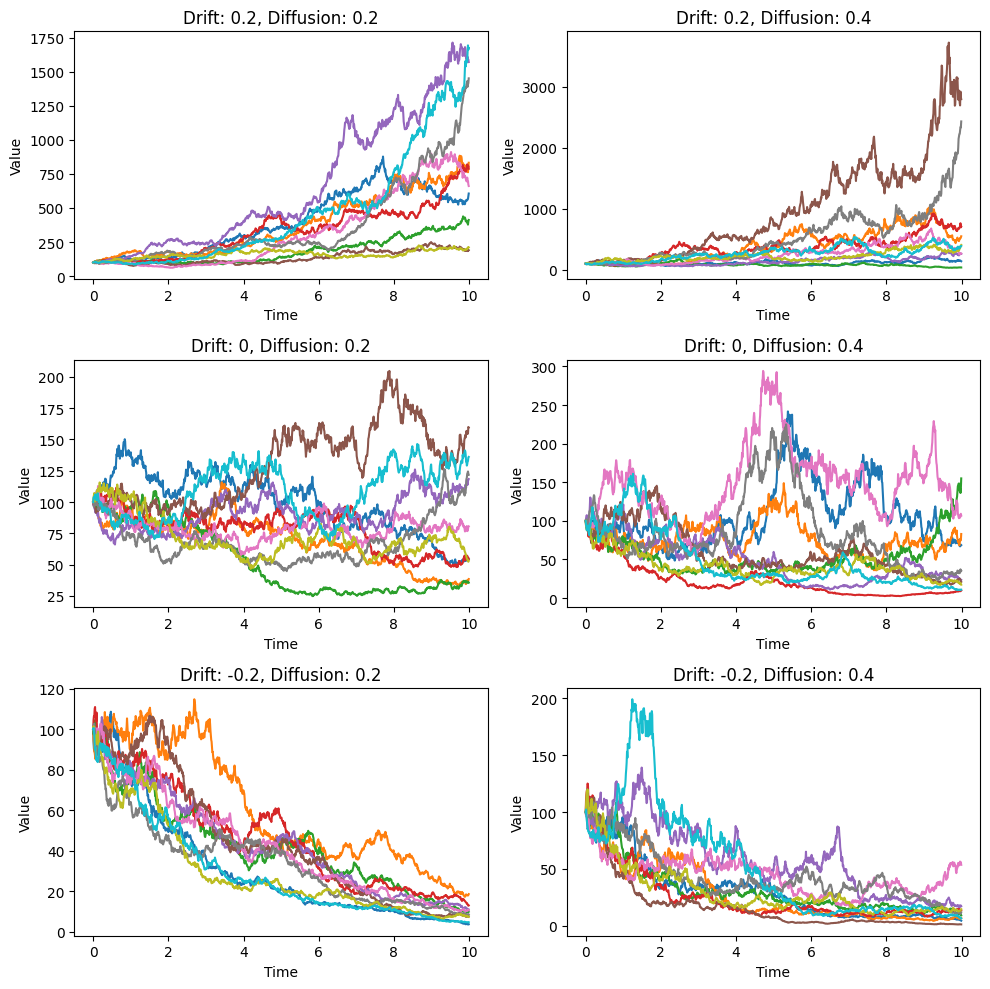

In [93]:
#Ito process example with drift and diffusion (16 plots with different drift and diffusion combinations)
# Simulation parameters
num_steps = 1000
dt = 0.01
time = np.arange(0, num_steps*dt, dt)

# Define a range of drift and diffusion values
drift_values = [0.2, 0, -0.2]
diffusion_values = [0.2, 0.4]

# Number of random walk iterations for each combination
num_iterations = 10

#creating the plots
fig, axes = plt.subplots(len(drift_values), len(diffusion_values), figsize=(10, 10))

for i, mu in enumerate(drift_values):
    for j, sigma in enumerate(diffusion_values):
        ax = axes[i, j]
        for _ in range(num_iterations):
            X = np.zeros(num_steps)
            X[0] = 100  # Starting value of the process
            for k in range(1, num_steps):
                dW = np.random.normal(0, np.sqrt(dt))
                X[k] = X[k-1] + mu * X[k-1] * dt + sigma * X[k-1] * dW

            ax.plot(time, X)

        ax.set_title(f"Drift: {mu}, Diffusion: {sigma}")
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")

plt.tight_layout()
plt.show()

# Ito's Lemma
Given Ito process $dX_{t} = \mu_{t}dt+\sigma dW_{t}$, we know that:
$$df(X_{t})=\frac{\partial f}{\partial x}dX_{t}+\frac{1}{2}\frac{\partial^{2}f}{\partial x^{2}}(dX_{t})^{2}$$
And since we know that $dt$ is very small/close to zero, we can also say that:
$$(dt)^2=0, (dW_{t})^2=(\sqrt{dt})^2=dt, (dW_{t})(dt)=0$$

How about for $\mathbb{R}^2$?

We can then say that, given $X_{t}$ and $Y_{t}$ is an Ito process and $f$ is sufficiently smooth, we know that: 
$$df(X_{t},Y_{t})=\frac{\partial f}{\partial x}dX_{t}+\frac{\partial f}{\partial x}dX_{t}+\frac{1}{2}\frac{\partial^{2}f}{\partial x^{2}}(dX_{t})^{2}+\frac{1}{2}\frac{\partial^{2}f}{\partial y^{2}}(dY_{t})^{2}+\frac{\partial^{2}f}{\partial x \partial y}(dX_{t})(dY_{t})$$

For example, if we want to find out the process for $f(X_{t},t)$, we know that $dY_{t}=1dt+0dW_{t}$. Using this, we can see that:
$$\begin{align*}
df(X_{t},t)&=\frac{\partial f}{\partial x}dX_{t}+\frac{\partial f}{\partial t}dt+\frac{1}{2}\frac{\partial^{2}f}{\partial x^{2}}(dX_{t})^{2}+\frac{1}{2}\frac{\partial^{2}f}{\partial t^{2}}(dt)^{2}+\frac{\partial^{2}f}{\partial x \partial t}(dX_{t})(dt)\\
&=\frac{\partial f}{\partial x}dX_{t}+\frac{\partial f}{\partial t}dt+\frac{1}{2}\frac{\partial^{2}f}{\partial x^{2}}(dX_{t})^{2}+\frac{\partial^{2}f}{\partial x \partial t}(dX_{t})(dt)\\
&=\frac{\partial f}{\partial x}dX_{t}+\frac{\partial f}{\partial t}dt+\frac{1}{2}\frac{\partial^{2}f}{\partial x^{2}}(dX_{t})^{2}
\end{align*}$$

# Geometric Brownian Motion
Let $dS_{t}=\mu S_{t}dt+\sigma S_{t}dW_{t}$
We know that given $f(x) = \log x$, $f'(x)=\frac{1}{x}$, and $f''(x)=-\frac{1}{x^2}$. Applying Ito's Rule:
$$
\begin{align*}
d\log S_{t}=df(S_{t})&=f'dS_{t}+\frac{1}{2}f''(dS_{t})^2\\
&=\frac{1}{S_{t}}dS_{t}-\frac{1}{2S_{t}^2}(dS_{t})^2\\
&=\mu dt+\sigma dW_{t}-\frac{1}{2}\sigma^2(dW_{t})^{2}\\
&=\frac{\mu-\sigma^{2}}{2}dt+\sigma dW_{t}
\end{align*}
$$

Using this, we can see that:
$$\log(S_{t})=\log S_{0}+\int_{0}^{t}\frac{\mu-\sigma^{2}}{2}du+\int_{0}^{t}\sigma dW_{u}=\log S_{0}+\frac{\mu-\sigma^{2}}{2}t+\sigma W_{t}$$

# Black Scholes Model

## Black Scholes PDE
First, let's establish our world. We have 2 basic assets: 
- Bank Account, with each unit price $B_{t}=e^{rt}$. This means $dB_{t}=rB_{t}dt$, with $B_{0}=0$
- We also have a non dividend paying stock $S$, with $dS_{t}=\mu S_{t}dt+\sigma S_{t}dW_{t}$

We want to build some portfolio of (Call, Shares) such that the portfolio is risk free (i.e. zero $dW$ term).
Firstly, we construct a portfolio with (1 option, -$a_{t}$ shares), making our portfolio $V_{t} = C_{t}-a_{t}S_{t}$. This gives us:
$$
dV_{t}=\frac{\partial C}{\partial t}dt+\frac{\partial C}{\partial S}dS_{t}+\frac{1}{2}\frac{\partial^{2} C}{\partial S^{2}}(dS_{t})^{2}-a_{t}dS_{t}
$$
By taking $a_{t}=\frac{\partial C}{\partial S}$, we end up with:
$$
\begin{align*}
dV_{t}&=\frac{\partial C}{\partial t}dt+\frac{1}{2}\frac{\partial^{2} C}{\partial S^{2}}(dS_{t})^{2}\\
&=\frac{\partial C}{\partial t}dt+\frac{1}{2}\frac{\partial^{2} C}{\partial S^{2}}(\mu S_{t}dt+\sigma S_{t}dW_{t})^{2}\\
&=(\frac{\partial C}{\partial t}+\frac{1}{2}\frac{\partial^{2} C}{\partial S^{2}}\sigma^{2} S_{t}^{2})dt
\end{align*}
$$

We also know that $V_{t}$ is a risk free portfolio such that:
$$
dV_{t}=rV_{t}dt=r(C_{t}-\frac{\partial C}{\partial S}S_{t})dt
$$

Solving both together, we get:
$$
\begin{align*}
\frac{\partial C}{\partial t}+\frac{1}{2}\frac{\partial^{2} C}{\partial S^{2}}\sigma^{2} S_{t}^{2}&=r(C_{t}-\frac{\partial C}{\partial S}S_{t})\\
C&=\frac{1}{r}(\frac{\partial C}{\partial t}+r\frac{\partial C}{\partial S}S_{t}+\frac{1}{2}\frac{\partial^{2} C}{\partial S^{2}}\sigma^{2} S_{t}^{2})
\end{align*}
$$

## Black Scholes Formula
$$
\begin{align*}
C^{BS}(S,t)&:=e^{-r(T-t)}(S_{t}N(d_1)-KN(d_{2})), \text{ where } t<T\\
\text{such that }d_{1,2}&:=d_{+,-}:=\frac{\log (S_{t}/K)}{\sigma\sqrt{T-t}}\pm \frac{\sigma\sqrt{T-t}}{2}
\end{align*}$$

### Delta of Option
The delta of a call option is simply just $a_{t}=\frac{\partial C}{\partial S}$. Applying this to BS formula gives you:
$$\frac{\partial C^{BS}}{\partial S}=N(d_{1})+S_{t}n(d_{1})\frac{\partial d_{1}}{\partial S_{t}}-Ke^{r(T-t)}n(d_{2})\frac{\partial d_{2}}{\partial S}=N(d_{1})$$

i.e. the CDF

For put option, the delta is just:
$$\frac{\partial P^{BS}}{\partial S}=N(d_{1})-1$$

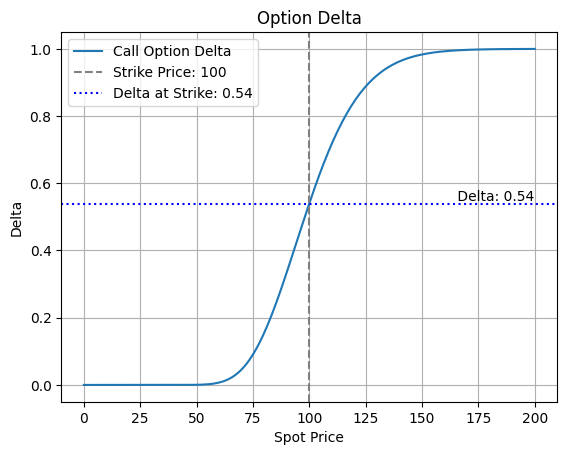

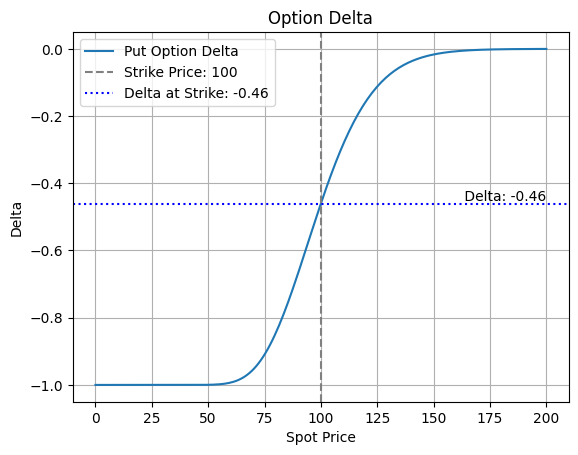

In [116]:
#Visualization of the delta of a call or put option at maturity
def option_delta(spot_prices, strike_price, risk_free_rate, volatility, time_to_maturity, is_call):
    d1 = (np.log(spot_prices / strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    
    if is_call:
        delta = norm.cdf(d1)
        plt.plot(spot_prices, delta, label='Call Option Delta')
        strike_delta = norm.cdf((np.log(strike_price / strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity)))
    else:
        delta = -norm.cdf(-d1)
        plt.plot(spot_prices, delta, label='Put Option Delta')
        strike_delta = -norm.cdf(-(np.log(strike_price / strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity)))

    plt.axvline(x=strike_price, color='grey', linestyle='--', label=f'Strike Price: {strike_price}')
    plt.axhline(y=strike_delta, color='blue', linestyle=':', label=f'Delta at Strike: {strike_delta:.2f}')
    plt.text(spot_prices[-1], strike_delta, f' Delta: {strike_delta:.2f}', verticalalignment='bottom', horizontalalignment='right')

    plt.title("Option Delta")
    plt.xlabel("Spot Price")
    plt.ylabel("Delta")
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage
spot_prices = np.linspace(0, 200, 200)
strike_price = 100
risk_free_rate = 0.0
volatility = 0.2
time_to_maturity = 1 # in years

option_delta(spot_prices, strike_price, risk_free_rate, volatility, time_to_maturity, True)  # Call option Delta
option_delta(spot_prices, strike_price, risk_free_rate, volatility, time_to_maturity, False) # Put option Delta

### Gamma of Option
The gamma of an option is differential of the delta, i.e.:
$$\frac{\partial^{2} C^{BS}}{\partial S^{2}}=\frac{n(d_{1})}{S_{t}\sigma \sqrt{T-t}}$$

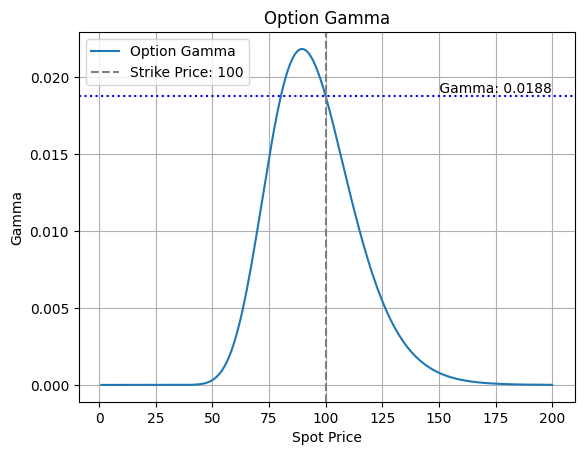

In [125]:
#Visualising gamma of an option
def option_gamma(spot_prices, strike_price, risk_free_rate, volatility, time_to_maturity):
    d1 = (np.log(spot_prices / strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    gamma = norm.pdf(d1) / (spot_prices * volatility * np.sqrt(time_to_maturity))

    strike_d1 = (np.log(strike_price / strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    strike_gamma = norm.pdf(strike_d1) / (strike_price * volatility * np.sqrt(time_to_maturity))

    plt.plot(spot_prices, gamma, label='Option Gamma')
    plt.axvline(x=strike_price, color='grey', linestyle='--', label=f'Strike Price: {strike_price}')
    plt.axhline(y=strike_gamma, color='blue', linestyle=':')
    plt.text(spot_prices[-1], strike_gamma, f' Gamma: {strike_gamma:.4f}', verticalalignment='bottom', horizontalalignment='right')
    
    plt.title("Option Gamma")
    plt.xlabel("Spot Price")
    plt.ylabel("Gamma")
    plt.grid(True)
    plt.legend(loc="upper left")
    plt.show()

# Example usage
spot_prices = np.linspace(0, 200, 200)
strike_price = 100
risk_free_rate = 0.05
volatility = 0.2
time_to_maturity = 1 # in years

option_gamma(spot_prices, strike_price, risk_free_rate, volatility, time_to_maturity)

## Theta of Option

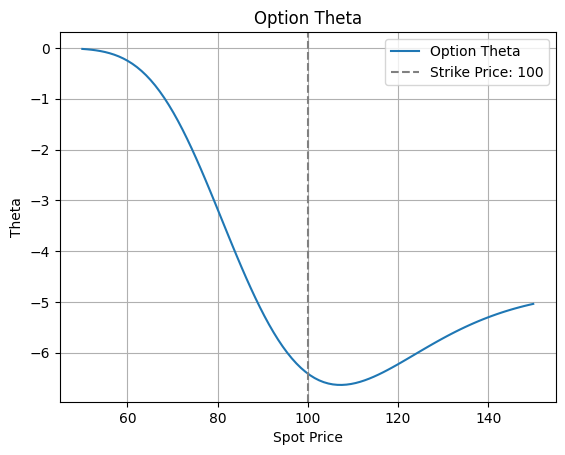

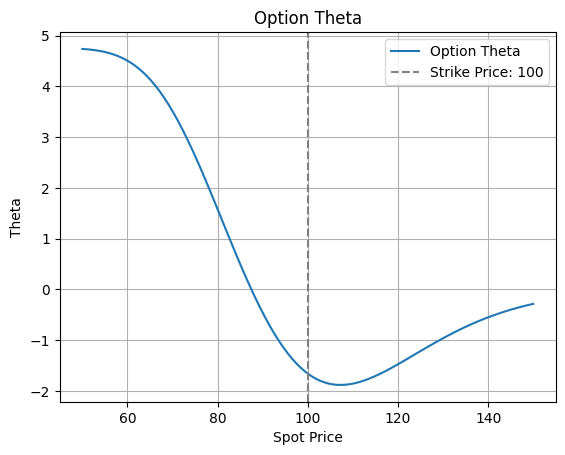

In [126]:
def option_theta(spot_prices, strike_price, risk_free_rate, volatility, time_to_maturity, is_call):
    d1 = (np.log(spot_prices / strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    if is_call:
        theta = - (spot_prices * volatility * norm.pdf(d1)) / (2 * np.sqrt(time_to_maturity)) - risk_free_rate * strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)
    else:
        theta = - (spot_prices * volatility * norm.pdf(-d1)) / (2 * np.sqrt(time_to_maturity)) + risk_free_rate * strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(-d2)

    # Plotting
    plt.plot(spot_prices, theta, label='Option Theta')
    plt.axvline(x=strike_price, color='grey', linestyle='--', label=f'Strike Price: {strike_price}')
    plt.title("Option Theta")
    plt.xlabel("Spot Price")
    plt.ylabel("Theta")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
spot_prices = np.linspace(50, 150, 100)
strike_price = 100
risk_free_rate = 0.05
volatility = 0.2
time_to_maturity = 1  # 1 year

option_theta(spot_prices, strike_price, risk_free_rate, volatility, time_to_maturity, True)  # Call option Theta
option_theta(spot_prices, strike_price, risk_free_rate, volatility, time_to_maturity, False) # Put option Theta